In [42]:
import json

import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from scipy import ndimage

In [15]:
with open('cities.geojson', 'r') as f:
    data = json.load(f)
    points = np.array([
        feat['geometry']['coordinates']
        for feat in data['features']
    ])
    print(len(points))

lons = points[:,0]
print(np.min(lons), np.max(lons))
lats = points[:,1]
print(np.min(lats), np.max(lats))

642
-121.890583 174.7631803
-37.8142176 59.938732


In [17]:
def maprange(a, b, s):
    (a1, a2), (b1, b2) = a, b
    return  b1 + ((s - a1) * (b2 - b1) / (a2 - a1))

In [27]:
outputSize = 600
normLons = [maprange((np.min(lons), np.max(lons)), (0, outputSize), l) for l in lons]
normLats = [maprange((np.min(lats), np.max(lats)), (0, outputSize), l) for l in lats]
normPoints = np.round(np.array(list(zip(normLons, normLats))))
normPoints

array([[414., 570.],
       [246., 548.],
       [295., 465.],
       ...,
       [459., 386.],
       [426., 373.],
       [414., 519.]])

In [33]:
img = np.zeros((outputSize + 1, outputSize + 1))
for lon, lat in normPoints:
    img[int(lat)][int(lon)] = 1

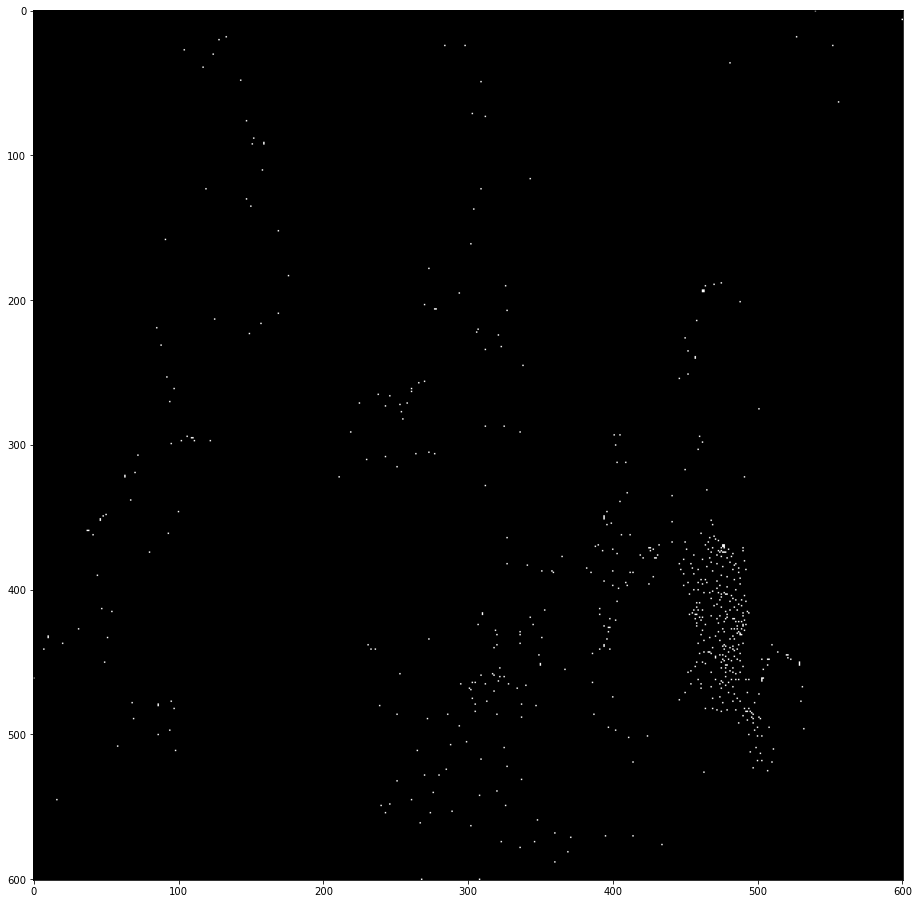

In [43]:
plt.figure(figsize=(16, 16))
plt.imshow(img, cmap='gray')
plt.show()

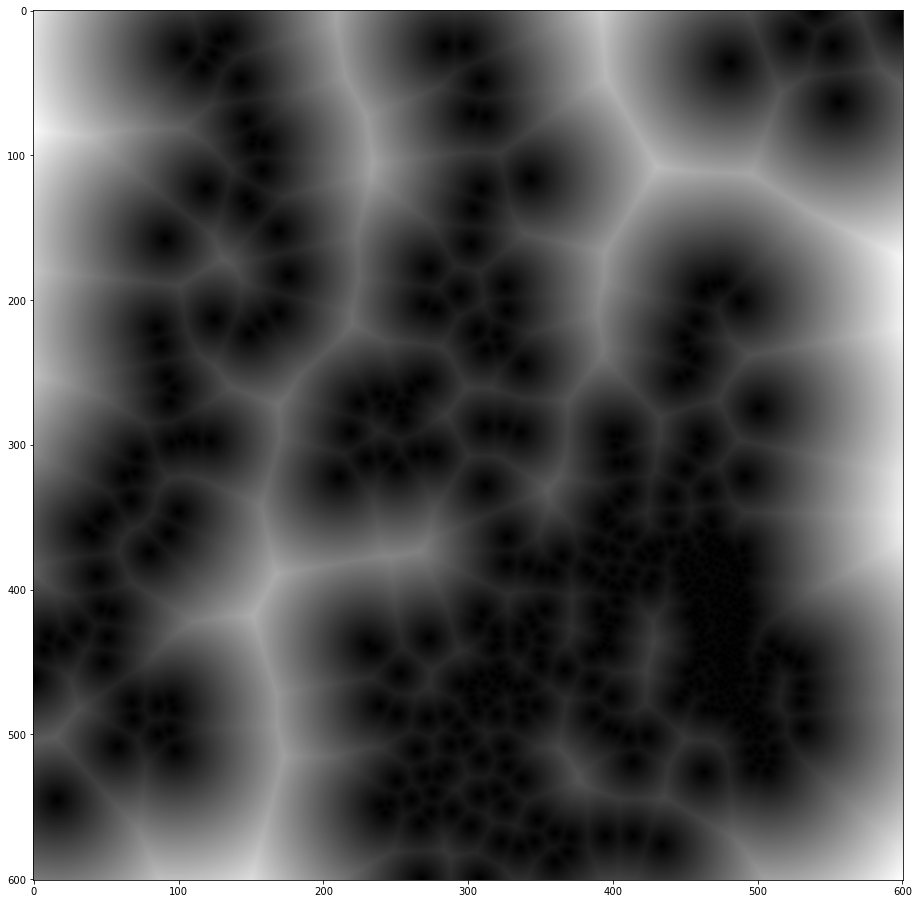

In [47]:
distImg = ndimage.distance_transform_edt(1 - img)
np.max(distImg)

plt.figure(figsize=(16, 16))
plt.imshow(distImg, cmap='gray')
plt.show()